 # 5. Kepler's Laws and Newton's Laws

In [1]:
from spb import (
    plot,
    plot_geometry,
    plot_list,
    plot_parametric
)
from spb.defaults import cfg
from sympy import (
    cos,
    Derivative,
    Eq,
    Function,
    Lambda,
    pi,
    Segment,
    sin,
    Symbol,
    symbols
)
from sympy.physics.vector import ReferenceFrame

cfg['matplotlib']['show_minor_grid'] = True

In [2]:
s, t = symbols('s, t')
v = Derivative(s, t)
v

Derivative(s, t)

In [3]:
a = Symbol('a')
a = Derivative(s, t, t)
a

Derivative(s, (t, 2))

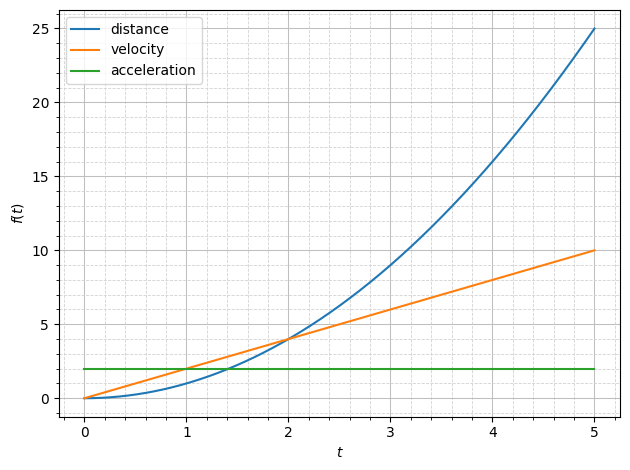

In [4]:
distance = t**2

plot(
    (distance, 'distance'),
    (v.subs(s, distance).doit(), 'velocity'),
    (a.subs(s, distance).doit(), 'acceleration'),
    (t, 0, 5)
)

In [5]:
x = Symbol('x')
N = ReferenceFrame('N')
N.indices

['x', 'y', 'z']

In [6]:
vector = N.x*x**2 + N.y*x**2 + N.z*x**2
vector

x**2*N.x + x**2*N.y + x**2*N.z

In [7]:
vector_velocity = vector
vector_velocity.diff(x, N)

2*x*N.x + 2*x*N.y + 2*x*N.z

In [8]:
vector_accelaration = vector.diff(x, N).diff(x, N)
vector_accelaration

2*N.x + 2*N.y + 2*N.z

In [9]:
v0 = symbols('v_0')
g = Function('g')

eq1 = Eq(v, g(t) + v0)
eq1

Eq(Derivative(s, t), v_0 + g(t))

In [10]:
eq1_subs = {
    s: t**2,
    g: Lambda((x), 2*x),
    t: 2,
    v0: 0
}

eq1.subs(eq1_subs).doit()

True

In [11]:
s0 = Symbol('s_0')
eq2 = Eq(s, (1/2)*g(t**2) + v0*t + s0)
eq2

Eq(s, s_0 + t*v_0 + 0.5*g(t**2))

In [12]:
eq2_subs = {**eq1_subs, s0: 0}
eq2.subs(eq2_subs)

True

In [13]:
A, r, theta, x_2dot, y_2dot = symbols('A, r, θ, \ddot{x}, \ddot{y}')

x_acceleration = A * cos(theta) / r**2
eq3 = Eq(x_2dot, x_acceleration)
eq3

Eq(\ddot{x}, A*cos(θ)/r**2)

In [14]:
xy_acceleration_subs = {
    A: 1,
    theta: 2,
    r: 2
}

x_acceleration.subs(xy_acceleration_subs)

cos(2)/4

In [15]:
y_acceleration = A * sin(theta) / r**2
eq4 = Eq(y_2dot, y_acceleration)
eq4

Eq(\ddot{y}, A*sin(θ)/r**2)

In [16]:
y_acceleration.subs(xy_acceleration_subs)

sin(2)/4

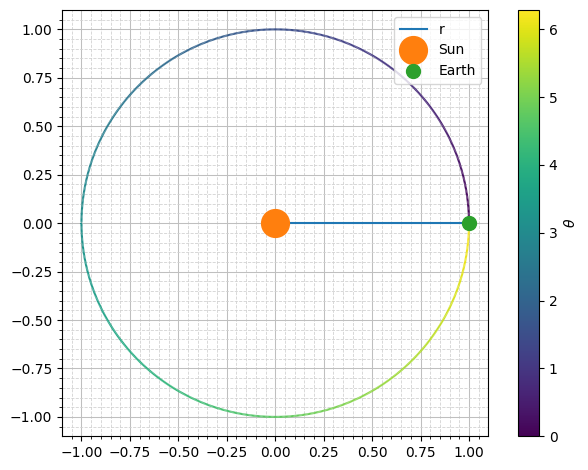

In [17]:
p1 = plot_parametric(
    x_acceleration.subs({A: 1, r: 1}),
    y_acceleration.subs({A: 1, r: 1}),
    (theta, 0, pi*2),
    aspect='equal',
    show=False
)

p2 = plot_geometry(
    (Segment((0, 0), (1, 0)), 'r'),
    show=False,
)

p3 = plot_list(
    ([0], [0], 'Sun', {'markersize': 20}),
    ([1], [0], 'Earth', {'markersize': 10}),
    is_point=True,
    show=False
)

(p1 + p2 + p3).show()

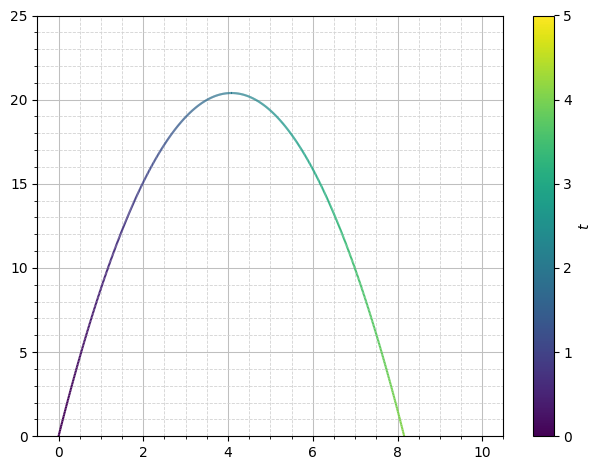

In [18]:
g, vx, vy = symbols('g, v_x, v_y')

x_axis = vx*t
y_axis = g*t**2/2 + vy*t

acceleration_of_gravity = 9.8067

plot_parametric(
    x_axis.subs({vx: 2}),
    y_axis.subs({g: -acceleration_of_gravity, vy: 20}),
    (t, 0, 5),
    ylim=(0, 25)
)

In [19]:
path_of_body = (g*t**2)/2 + vy*t
path_of_body

g*t**2/2 + t*v_y

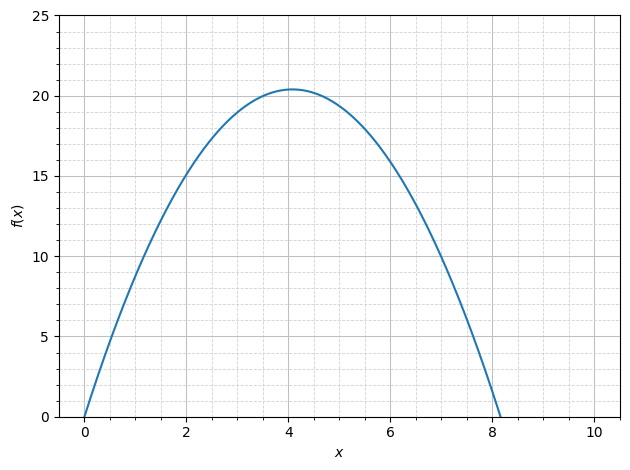

In [20]:
plot(
    path_of_body.subs(
        {
            g: -acceleration_of_gravity,
            vx: 2,
            vy: 20,
            t: x/vx
        }
    ),
    (x, 0, 10),
    ylim=(0, 25)
)